In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Eliminar columas que no nos interesan
df_clean = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement']].copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [4]:
#seteamos esto para que nos devuelva numeros decimales
pd.set_option('display.float_format', lambda x: '%.3f' %x)

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,7.657,1788.391,291.509
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,1.175,828.091,442.575
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,290.000,0.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,7.000,1190.000,0.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,7.000,1560.000,0.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,8.000,2210.000,560.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,13.000,9410.000,4820.000


In [5]:
#Definimos la correlacion entre las variables
correlacion = df_clean.corr()
correlacion

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
price,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.667,0.606,0.324
bedrooms,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.357,0.478,0.303
bathrooms,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,0.665,0.685,0.284
sqft_living,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,0.763,0.877,0.435
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,0.114,0.184,0.015
floors,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,0.458,0.524,-0.246
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.083,0.072,0.081
view,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.251,0.168,0.277
grade,0.667,0.357,0.665,0.763,0.114,0.458,0.083,0.251,1.000,0.756,0.168
sqft_above,0.606,0.478,0.685,0.877,0.184,0.524,0.072,0.168,0.756,1.000,-0.052


In [6]:
#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

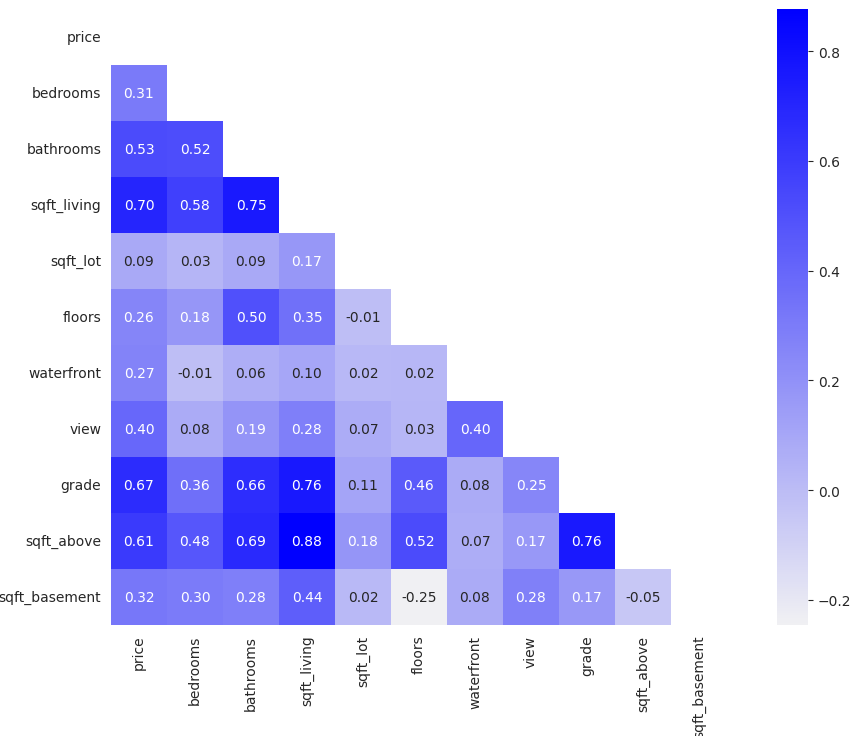

In [7]:
cores = sns.color_palette('light:blue', as_cmap=True)#Paleta de colores
mask = np.zeros_like(correlacion)#Informacion
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

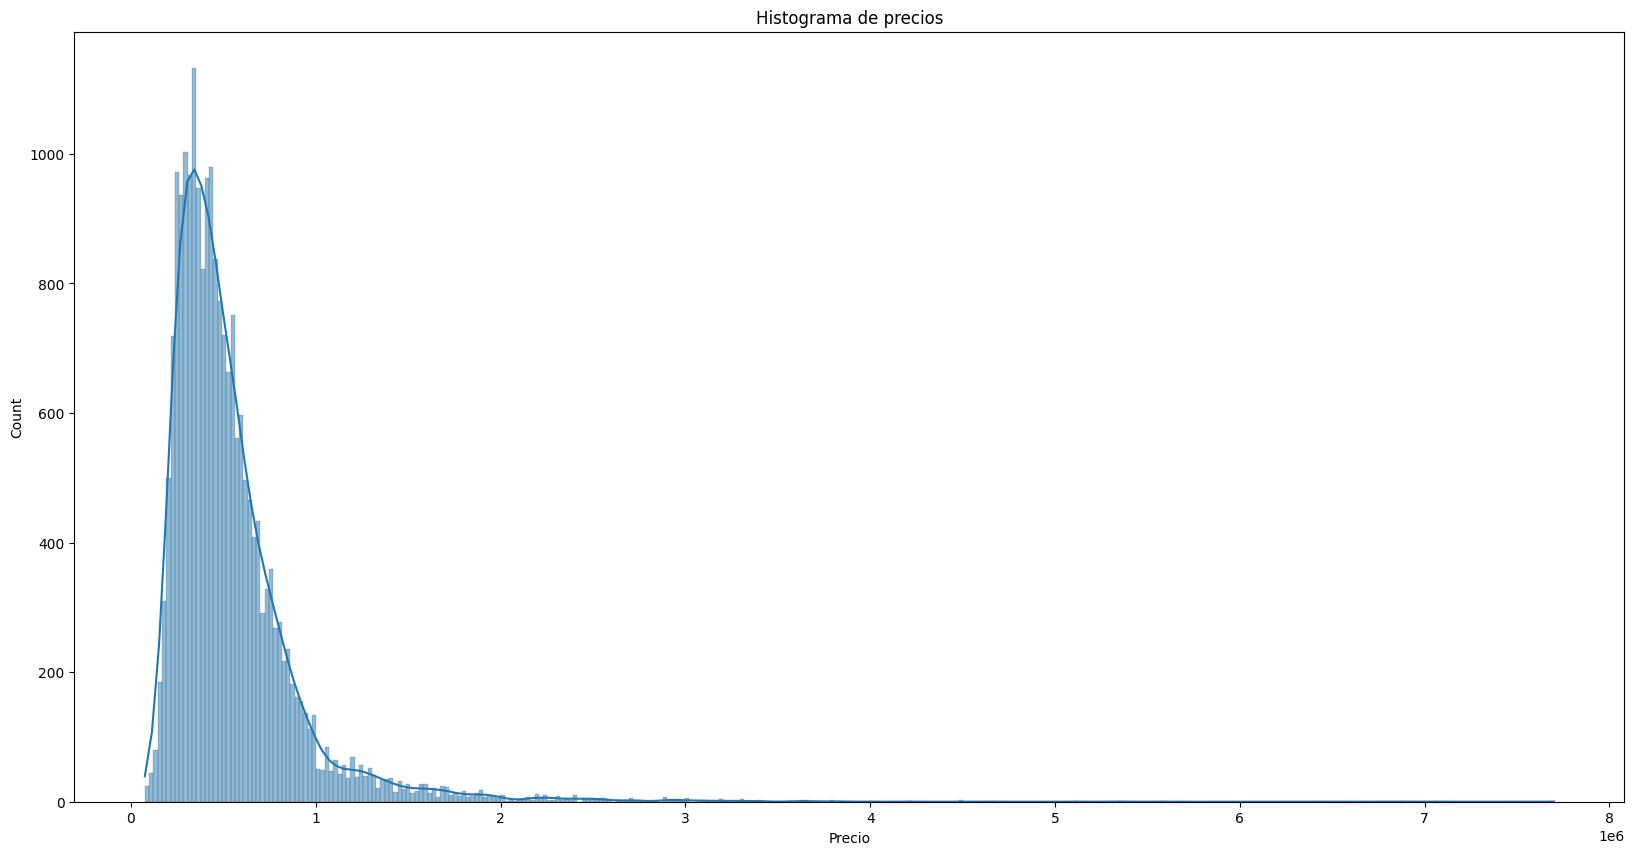

In [8]:
ax = sns.histplot(data=df_clean, x='price', kde=True)#definir el histograma
ax.figure.set_size_inches(20, 10)#Tamano
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

Utilizemos dos formas para intentar llegar a la distribucion simetrica

In [9]:
#Limpieza de los datos utilizando IQR

Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)

IQR = Q3 - Q1#Calculo del IQR 

#Definir limites
lower_bound = Q1 - 1.5 * IQR#alto
upper_bound = Q3 + 1.5 * IQR#bajo

#Filtrar dataframe
df_filtered = df_clean[(df_clean['price']>=lower_bound) & (df_clean['price'] <= upper_bound)]

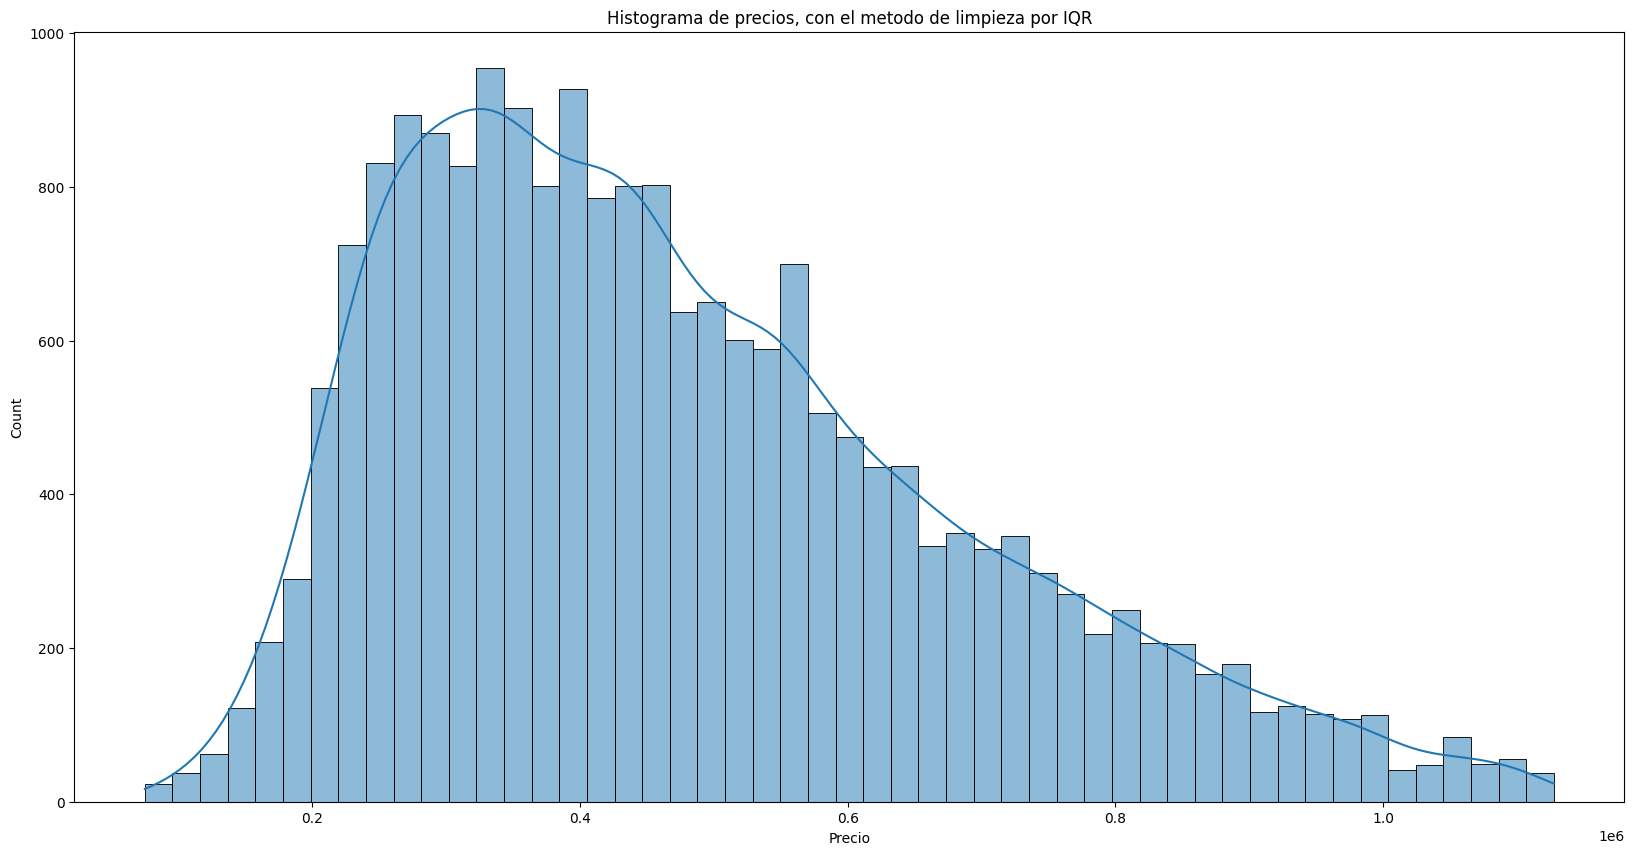

In [80]:
ax = sns.histplot(data=df_filtered, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios, con el metodo de limpieza por IQR')
ax.set_xlabel('Precio');

In [11]:
from sklearn.preprocessing import FunctionTransformer#Funcion para transformar datos por logaritmo

transformer = FunctionTransformer(np.log1p, validate=True)#Definimos la funcion transformer 
datos_transformados = transformer.transform(df_clean)#Transformacion de datos

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [12]:
columnas_datos_tranformados = df_clean.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df_clean.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
df_transformado.head()#Dataframe transformado

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
0,12.310,1.386,0.693,7.074,8.640,0.693,0.000,0.000,2.079,7.074,0.000
1,13.196,1.386,1.179,7.852,8.888,1.099,0.000,0.000,2.079,7.683,5.994
2,12.101,1.099,0.693,6.648,9.210,0.693,0.000,0.000,1.946,6.648,0.000
3,13.311,1.609,1.386,7.581,8.517,0.693,0.000,0.000,2.079,6.957,6.815
4,13.142,1.386,1.099,7.427,8.997,0.693,0.000,0.000,2.197,7.427,0.000


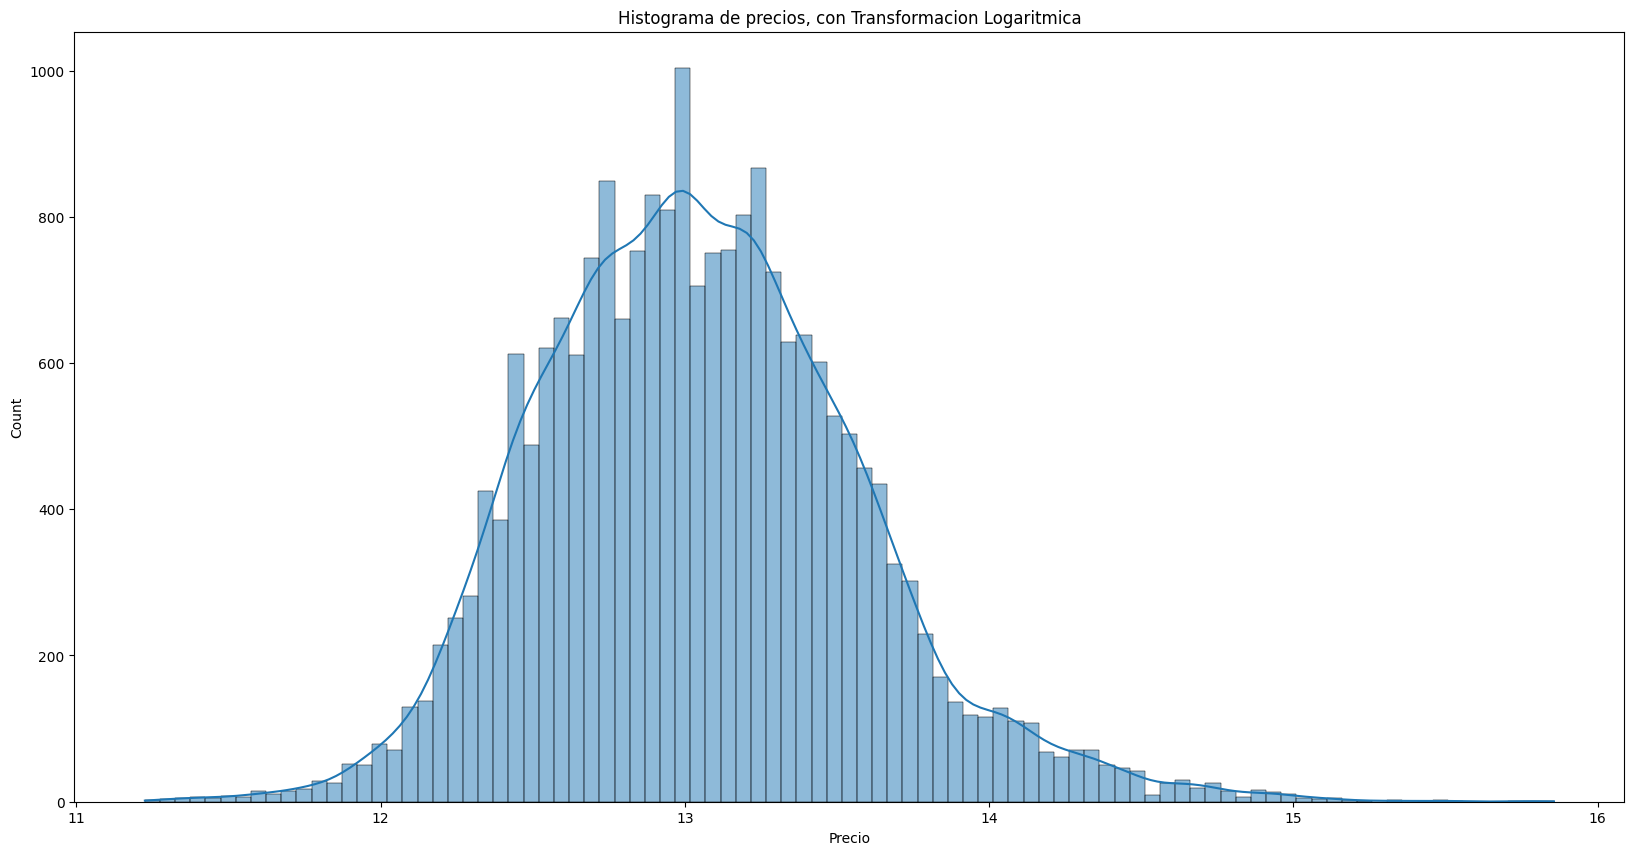

In [81]:
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios, con Transformacion Logaritmica')
ax.set_xlabel('Precio');

Obtenemos una mejor distribucion con el metodo de transformacion logaritmica

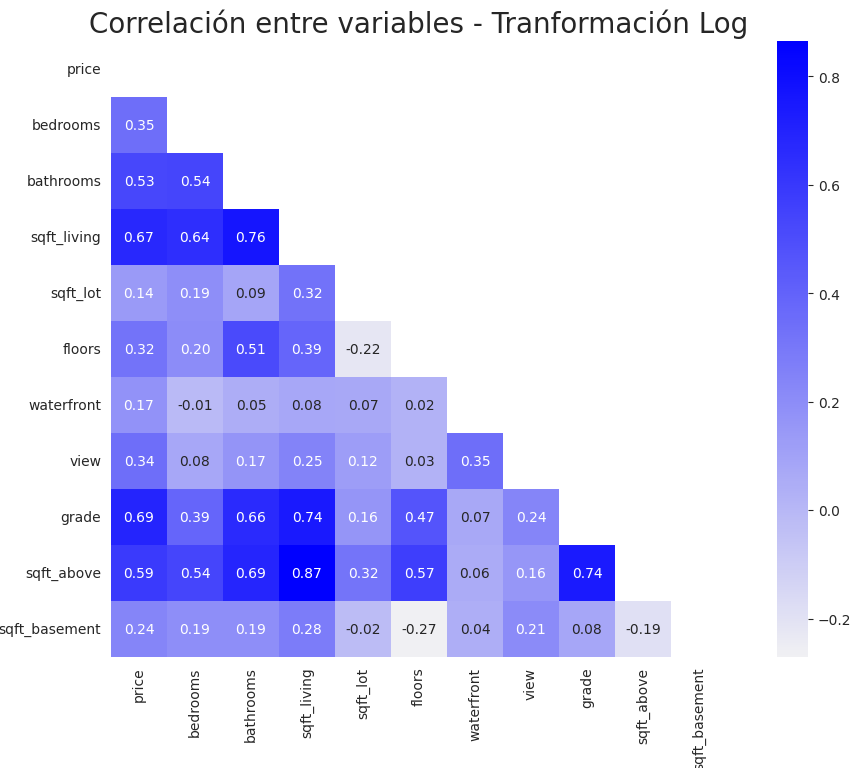

In [14]:
correlacion_transformada = df_transformado.corr()#Hacemos la matriz de correlacion con el nuevo dataframe 
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

#### Regresion

In [15]:
#variables independientes
X = df_transformado.drop('price', axis=1)

#variable dependiente
y = df_transformado['price']

### Creacion del modelo de regresion lineal

In [16]:
from sklearn.linear_model import LinearRegression #Regresion lineal simple
from sklearn.model_selection import train_test_split #Dividir los datos para entrenar y testear
from sklearn.metrics import r2_score # Obtener el desempeño del modelo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Segmentacion de los datos 

In [18]:
regresion = LinearRegression() #Inicializar el modelo

In [19]:
regresion.fit(X_train, y_train) #Datos de entrenamiento

LinearRegression()

In [20]:
#Prueba
prediccion = regresion.predict(X_test)#Pasamos los datos restantes para testear

prediccion #Obtenemos el resultado de la prediccion

array([13.0740276 , 13.28793   , 14.02935428, ..., 12.68525067,
       13.50003075, 13.31710419])

In [21]:
r2_regresion = r2_score(y_test, prediccion)#Ponemos los verdaderos datos y los datos resultantes de la prediccion
r2_regresion #Metrica de desempeño

0.5820531352787708

### Arbol de decision para regresion

In [22]:
from sklearn.tree import DecisionTreeRegressor #Modelo de arbol de decision

In [23]:
dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) #Inicializamos el modelo, Max_depth = Profundidad del arbol, min_samples_leaf=Numero de divisiones de nodos minima

In [24]:
dtr.fit(X_train, y_train) #Entrenamiento del modelo

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [25]:
prediccion_dtr = dtr.predict(X_test) #Prediccion con datos 

prediccion_dtr

array([13.05951131, 13.3283664 , 13.6853387 , ..., 12.68769879,
       13.34005018, 13.3283664 ])

In [26]:
r2_dtr = r2_score(y_test ,prediccion_dtr)

r2_dtr #Desempeño

0.569631091774182

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor #Clasificacion de bosques aleartorios

In [28]:
rf = RandomForestRegressor(
    n_estimators=45, #Numero de arboles en el bosque 
    max_depth=5, #Profundidad del arbol
)

In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=45)

In [30]:
prediccion_rf = rf.predict(X_test)

prediccion_rf

array([13.04086687, 13.27491077, 13.8876305 , ..., 12.69223194,
       13.34843457, 13.28570388])

In [31]:
r2_rf = r2_score(y_test, prediccion_rf)

r2_rf

0.5925329154000981

### Optimizacion

In [32]:
from sklearn.model_selection import cross_val_score, KFold #Validacion cruzada

In [33]:
cv = KFold(n_splits=7, shuffle=True) #n_splits = numero de particiones de los subconjuntos

In [34]:
acurracy_cross_val_r2 = cross_val_score(
    estimator=dtr,#Modelo de prediccion que va a mejorar
    X=X_train,#Datos de entrenamiento
    y=y_train,
    scoring='r2',#metodo para medir el desempeño (evaluar el modelo)
    cv=cv #Numero de splits o particiones que definimos
)
print('Acurracy promedio de r2: {}'.format(round(acurracy_cross_val_r2.mean(), 3)))

Acurracy promedio de r2: 0.571


### Optimizacion con Random Search validation

In [35]:
from sklearn.model_selection import RandomizedSearchCV #Búsqueda aleatoria en los hiperparámetros.

In [37]:
param_random_rf = {
    'n_estimators': [150, 250],#numero de arboles
    'max_depth': [20, 30],#profundidad del arbol
    'min_samples_leaf': [3],#minimo de hojas o resultados finales
    'min_samples_split': [6, 8, 10],#minimo de divisiones
}

In [38]:
randomcv_rf = RandomizedSearchCV(
    rf,#Modelo a mejorar 
    param_random_rf,#Parametros
    n_iter=5, #Numero de iteraciones
    cv=cv, 
    scoring='r2',
    n_jobs=1, #Numero de trabajos en simultaneo para evaluar
)

In [39]:
randomcv_rf.fit(X_train, y_train) #Busqueda de los parametros optimos

RandomizedSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=5,
                                                   n_estimators=45),
                   n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [20, 30],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [6, 8, 10],
                                        'n_estimators': [150, 250]},
                   scoring='r2')

In [43]:
pd.DataFrame(randomcv_rf.cv_results_) #obtener resultados

randomcv_rf.best_params_ #Obtener parametros mas eficientes

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [71]:
rf_op = RandomForestRegressor( #Implementacion de parametros 
    n_estimators = 250,
    min_samples_split= 10,
    min_samples_leaf= 3,
    max_depth = 30
)

In [73]:
rf_op.fit(X_train, y_train) #Entrenamiento con parametros optimos

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=250)

In [74]:
prediccion_rf_op = rf_op.predict(X_test)

prediccion_rf_op #Prediccion del nuevo modelo

array([13.09847657, 13.24128785, 13.90679772, ..., 12.68752645,
       13.66505717, 13.61342786])

In [75]:
r2_score(y_test, prediccion_rf_op) #Evaluacion del nuevo modelo

0.632900300965688

### Pruebas con datos input

In [76]:
cliente = pd.DataFrame({'bedrooms':[4], 
                        'bathrooms':[3], 
                        'sqft_living':[1918],	
                        'sqft_lot':[7242], 
                        'floors':[4], 
                        'waterfront':[1],	
                        'view':[0],	
                        'grade':[13],	
                        'sqft_above':[1918],	
                        'sqft_basement':[7242]})
cliente

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
0,4,3,1918,7242,4,1,0,13,1918,7242


In [77]:
X_train.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
167,1.609,1.253,7.894,8.412,1.099,0.000,0.000,2.303,7.894,0.000


In [78]:
cliente_transformado = transformer.transform(cliente[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                                  'grade', 'sqft_above', 'sqft_basement']])
cliente_transformado = pd.DataFrame(cliente_transformado, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                                  'grade', 'sqft_above', 'sqft_basement'])

cliente_transformado

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
0,1.609,1.386,7.560,8.888,1.609,0.693,0.000,2.639,7.560,8.888


In [82]:
prediccion_cliente = randomcv_rf.predict(cliente_transformado)

print(np.expm1(prediccion_cliente)) #Utilizamos la funcion expm1 para que nos devuelva los resultados reales.

[754141.23142567]
